# PREDICTIVE SALES MACHINE LEARNING MODEL

The data scientists at BIG MART have collected sales data for 1559 products across 10 stores in different cities.

Furthermore, certain attributes of each products and store have been defined.

The aim of this project is to build a predictive model and find the sales figure of each product.

Using this model, BIG MART will try to understand the properties of products and stores, which play a key role in increasing sales.

In [1]:
#import important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the train and test dataset in pandas dataframe
train=pd.read_csv("bigmart_train.csv")
test=pd.read_csv("bigmart_test.csv")

In [3]:
#check number of rows and columns in train dataset
train.shape

(8523, 12)

In [4]:
#first 5 rows of train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#check number of rows and columns in test dataset
test.shape

(5681, 11)

In [6]:
#first 5 rows of test dataset
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#combine test and train data into one file to perform EDA
train['source']="train"
test['source']="test"
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [8]:
#numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
#The 5681 missing values in Item_Outlet_Sales column will be predicted by the model.

In [11]:
#unique values in Item_Fat_Content column
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
#unique values in Outlet_Establishment_Year column
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
#calculating the outlet age
data['Outlet_Age']=2023-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [14]:
#count values of Item_Fat_Content column
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [15]:
#count values of Outlet_Size column
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Majority of outlets are medium and small scale outlets.

In [16]:
#mode function to find most common  value in outlet_size
data['Outlet_Size'].mode()[0]

'Medium'

In [17]:
#There are 2 variables with missing values - Item_Weight and Outlet_Size
#Replacing missing values in Outlet_Size with the value "medium"
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [18]:
#Replacing missing values in Item_Weight with the mean weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

(array([4390., 3918., 2611., 1650.,  939.,  447.,  105.,   65.,   50.,
          29.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

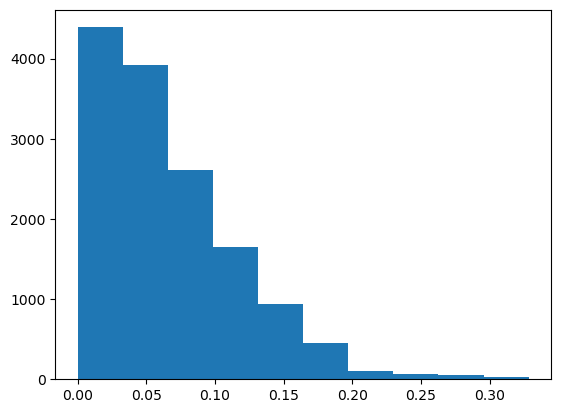

In [19]:
#plotting a histogrm to reveal distribution of Item_Visibility column
plt.hist(data['Item_Visibility'])

In [20]:
#Detecting the outliers:
#An outlier is the data point that lies outside the overall pattern in the distribution
#A data point is an outlier if it is more than 1.5*IQR above the 3rd quartile or below the first quartile
#Plotting a boxplot for outliers for 2 columns:
col=['Item_Weight','Item_Visibility']

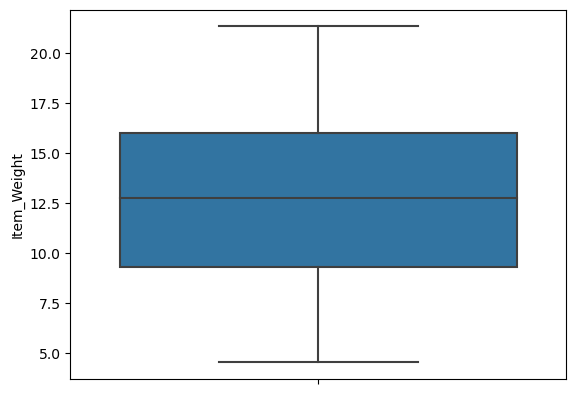

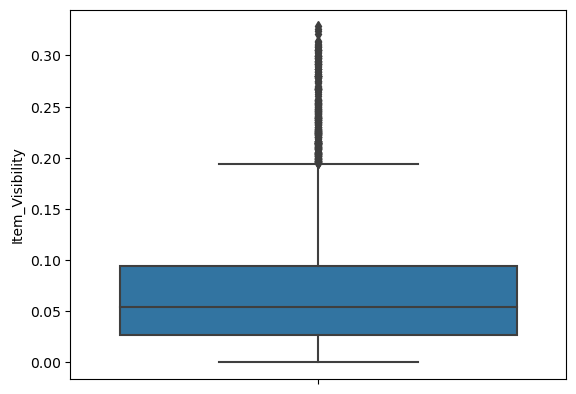

In [21]:
for c in col:
    plt.figure()
    sns.boxplot(y=c,data=data)

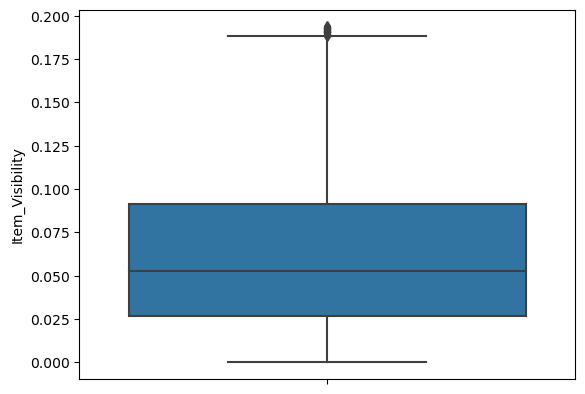

In [22]:
#Removing the outliers
col=["Item_Visibility"]
for c in col:
    percentile25=data[c].quantile(0.25)
    percentile75=data[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    data=data[(data[c]<=upper_limit) & (data[c]>=lower_limit)]
    plt.figure()
    sns.boxplot(y=c,data=data)

In [23]:
#Printing the shape of data after removing outliers
data.shape

(13943, 14)

In [24]:
#Modify Item_Visibility by converting numerical values to categorical i.e Low Visibility, Medium Visibility, High Visibility
data['Item_Visibility_New']=pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Med Viz','High Viz'])

In [25]:
data['Item_Visibility_New'].value_counts()

Low Viz     7363
Med Viz     4283
High Viz    1418
Name: Item_Visibility_New, dtype: int64

In [26]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_New           879
dtype: int64

In [27]:
#Replace null values in Item_Visibility_New with Low Viz
data['Item_Visibility_New'].fillna("Low Viz",inplace=True)

In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_New             0
dtype: int64

In [29]:
#Replace low fat and LF with Low Fat in Item_Fat_Content column
data['Item_Fat_Content']=data['Item_Fat_Content'].str.replace("low fat","Low Fat",regex=True)
data['Item_Fat_Content']=data['Item_Fat_Content'].str.replace("LF","Low Fat",regex=True)

In [30]:
#Replace reg with Regular in Item_Fat_Content column
data['Item_Fat_Content']=data['Item_Fat_Content'].str.replace("reg","Regular",regex=True)

In [31]:
#Unique fat count values
data['Item_Fat_Content'].value_counts()

Low Fat    9032
Regular    4911
Name: Item_Fat_Content, dtype: int64

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25,Low Viz
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36,Low Viz


In [33]:
#Exploring the column Item_Identifier
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [34]:
#As there are multiple categories combined above, replace this by mapping
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [35]:
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [36]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_New,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24,Low Viz,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14,Low Viz,Drinks


In [37]:
#Dropping the unnecessary columns that have been converted to different types
data.drop(['Item_Identifier','Item_Visibility','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [38]:
cat_cols=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Visibility_New','Item_Type_Combined']

In [40]:
le=LabelEncoder()

In [41]:
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [42]:
data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_New,Item_Type_Combined
0,9.30,0,249.8092,9,1,0,1,3735.1380,train,24,1,1
1,5.92,1,48.2692,3,1,2,2,443.4228,train,14,1,0
2,17.50,0,141.6180,9,1,0,1,2097.2700,train,24,1,1
3,19.20,1,182.0950,0,1,2,0,732.3800,train,25,1,1
4,8.93,0,53.8614,1,0,2,1,994.7052,train,36,1,2


In [43]:
#Divide this dataset 'data' created earlier into train and test datasets
train= data.loc[data["source"]=="train"]
test= data.loc[data["source"]=="test"]

In [44]:
train.shape

(8375, 12)

In [45]:
test.shape

(5568, 12)

In [46]:
#Drop unnecessary columns from train and test
train.drop(['source'],axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

In [47]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_New,Item_Type_Combined
0,9.30,0,249.8092,9,1,0,1,3735.1380,24,1,1
1,5.92,1,48.2692,3,1,2,2,443.4228,14,1,0


In [48]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_New,Item_Type_Combined
8523,20.75,0,107.8622,9,1,0,1,24,1,1
8524,8.30,1,87.3198,2,1,1,1,16,1,1


In [50]:
#creating independent variable X_train and dependent variable Y_train
X_train= train.drop(['Item_Outlet_Sales'],axis=1).values
X_train

array([[  9.3   ,   0.    , 249.8092, ...,  24.    ,   1.    ,   1.    ],
       [  5.92  ,   1.    ,  48.2692, ...,  14.    ,   1.    ,   0.    ],
       [ 17.5   ,   0.    , 141.618 , ...,  24.    ,   1.    ,   1.    ],
       ...,
       [ 10.6   ,   0.    ,  85.1224, ...,  19.    ,   1.    ,   2.    ],
       [  7.21  ,   1.    , 103.1332, ...,  14.    ,   0.    ,   1.    ],
       [ 14.8   ,   0.    ,  75.467 , ...,  26.    ,   1.    ,   0.    ]])

In [51]:
Y_train=train['Item_Outlet_Sales'].values
Y_train

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [52]:
X_test=test.values
X_test

array([[ 20.75  ,   0.    , 107.8622, ...,  24.    ,   1.    ,   1.    ],
       [  8.3   ,   1.    ,  87.3198, ...,  16.    ,   1.    ,   1.    ],
       [ 14.6   ,   0.    , 241.7538, ...,  25.    ,   2.    ,   2.    ],
       ...,
       [ 10.    ,   0.    , 118.744 , ...,  21.    ,   2.    ,   2.    ],
       [ 15.3   ,   1.    , 214.6218, ...,  16.    ,   1.    ,   1.    ],
       [  9.5   ,   1.    ,  79.796 , ...,  21.    ,   2.    ,   1.    ]])

In [53]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
X_train=sc.fit_transform(X_train)

In [55]:
X_test=sc.transform(X_test)

In [56]:
#Building the Linear Regression Model
reg=LinearRegression()

In [57]:
reg.fit(X_train,Y_train)

LinearRegression()

In [58]:
#Predicting Sales
predictions=reg.predict(X_test)

In [59]:
reg.intercept_

2213.8448623761196

In [60]:
reg.coef_

array([  -3.54430732,   22.57395946,  985.38881787,  157.39869786,
       -198.96049747, -193.93451288,  697.03245315,    6.30282421,
         20.31129156,   -7.21899007])

In [61]:
#Printing the predicted sales array
predictions

array([2021.24352323, 1118.43934107, 2299.10828912, ..., 1868.54015494,
       3126.86554011, 1313.7584604 ])

In [67]:
test['predicted'] = predictions

In [68]:
test.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Visibility_New,Item_Type_Combined,predicted
8523,20.750000,Drinks,107.8622,9,1,0,1,24,1,1,2021.243523
8524,8.300000,Food,87.3198,2,1,1,1,16,1,1,1118.439341
8525,14.600000,Drinks,241.7538,0,1,2,0,25,2,2,2299.108289
8526,7.315000,Drinks,155.0340,2,1,1,1,16,1,1,2143.421040
8527,12.792854,Food,234.2300,5,1,2,3,38,2,1,5187.432058


In [69]:
dfnew=test.groupby('Outlet_Identifier')['predicted'].sum().reset_index()
dfnew

,Outlet_Identifier,predicted
0,0,2.255356e+05
1,1,1.234138e+06
2,2,1.219587e+06
3,3,1.621095e+06
4,4,3.428137e+05
5,5,2.297925e+06
6,6,1.107163e+06
7,7,1.372534e+06
8,8,1.336636e+06
9,9,1.610475e+06
